In [2]:
import numpy as np
import matplotlib.pyplot as plt


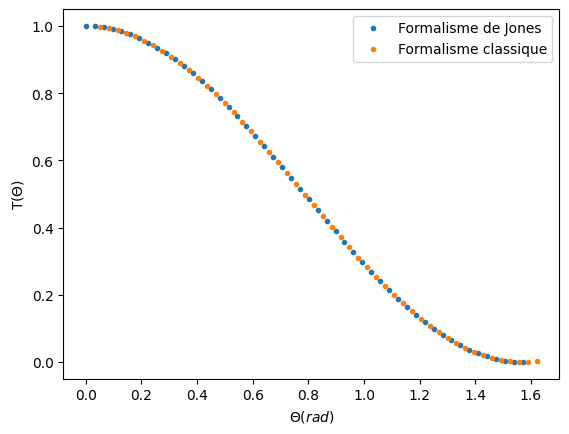

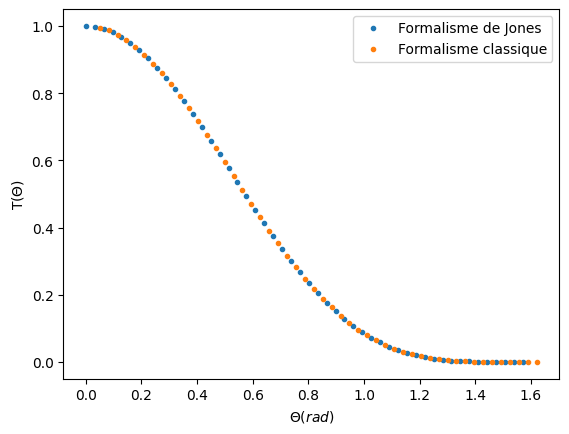

In [11]:
# Calcul de l'amplitude du vecteur de Jones pour 1 polariseur dépendant de theta
def jones1Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Calcul de l'amplitude du vecteur de Jones pour 2 polariseur dépendant de theta
def jones2Pol(theta):

    M2 = np.array([[(np.cos(theta))**2,np.sin(theta)*np.cos(theta) ],[np.sin(theta)*np.cos(theta),(np.sin(theta))**2 ]])
    M3 = np.array([[(np.cos(2*theta))**2,np.sin(2*theta)*np.cos(2*theta) ],[np.sin(2*theta)*np.cos(2*theta),(np.sin(2*theta))**2 ]])
    J_ini = np.array([1, 0])

    M_tot = M3@M2
    J_fin = M_tot.dot(J_ini)

    return np.linalg.norm(J_fin)**2

# Définition des vecteur pour les graphs
epsilon = 0.05
thetaPoints = np.linspace(0, np.pi/2, 50)
thetaPoints2 = np.linspace(0+epsilon, np.pi/2+epsilon, 50)
power1Coeff = []
power2Coeff = []
cos2 = (np.cos(thetaPoints2))**2
cos4 = (np.cos(thetaPoints2))**4


# Pas opti, mais ca marche
for theta in thetaPoints : 
    power1Coeff.append(jones1Pol(theta))
    power2Coeff.append(jones2Pol(theta))


# Graphiques Jones (à modifier pour les cas classiques)
plt.figure()
plt.plot(thetaPoints, power1Coeff, '.', label='Formalisme de Jones')
plt.plot(thetaPoints2, cos2,'.',  label='Formalisme classique')
plt.xlabel(f'$\Theta (rad)$')
plt.ylabel(f'T($\Theta$)')
plt.legend()
plt.savefig('2pol.png')

plt.figure()
plt.plot(thetaPoints, power2Coeff, '.', label='Formalisme de Jones')
plt.plot(thetaPoints2, cos4,'.',  label='Formalisme classique')
plt.xlabel(f'$\Theta (rad)$')
plt.ylabel(f'T($\Theta$)')
plt.legend()
plt.savefig('3pol.png')
